# 2

## [25 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience applying clustering algorithms and comparing these techniques on various datasets to experience the pros and cons of these approaches when the structure of the data being clustered varies. For this exercise, we'll explore clustering in two dimensions to make the results more tangible, but in practice these approaches can be applied to any number of dimensions.

*Note: For each set of plots across the five datasets, please create subplots within a single figure (for example, when applying DBSCAN - please show the clusters resulting from DBSCAN as a single figure with one subplot for each dataset). This will make comparison easier.*

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below.
- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each dataset, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When it's not clear, you will have to use your judgment in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing the quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgment for each dataset and your inspection of the dataset.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

*Note: For these clustering plots in this question, do NOT include legends indicating cluster assignment; instead, just make sure the cluster assignments are clear from the plot (e.g. different colors for each cluster)*



Code is provided below for loading the datasets and for making plots with the clusters as distinct colors

In [1]:
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
X4, _ = make_moons(n_samples=n_samples, noise=0.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [2]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    """Plot two-dimensional data clusters

    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2]
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    """
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1,
            # color them gray)
            kwargs = {"color": "gray"}
            n_clusters = n_clusters - 1
        ax.scatter(
            data[cluster_assignments == ca, 0],
            data[cluster_assignments == ca, 1],
            s=5,
            alpha=0.5,
            **kwargs,
        )
        ax.set_xlabel("feature 1")
        ax.set_ylabel("feature 2")
        ax.set_title(f"No. Clusters = {n_clusters}")
        ax.axis("equal")

**ANSWER**

**(a)** Initial data visualization

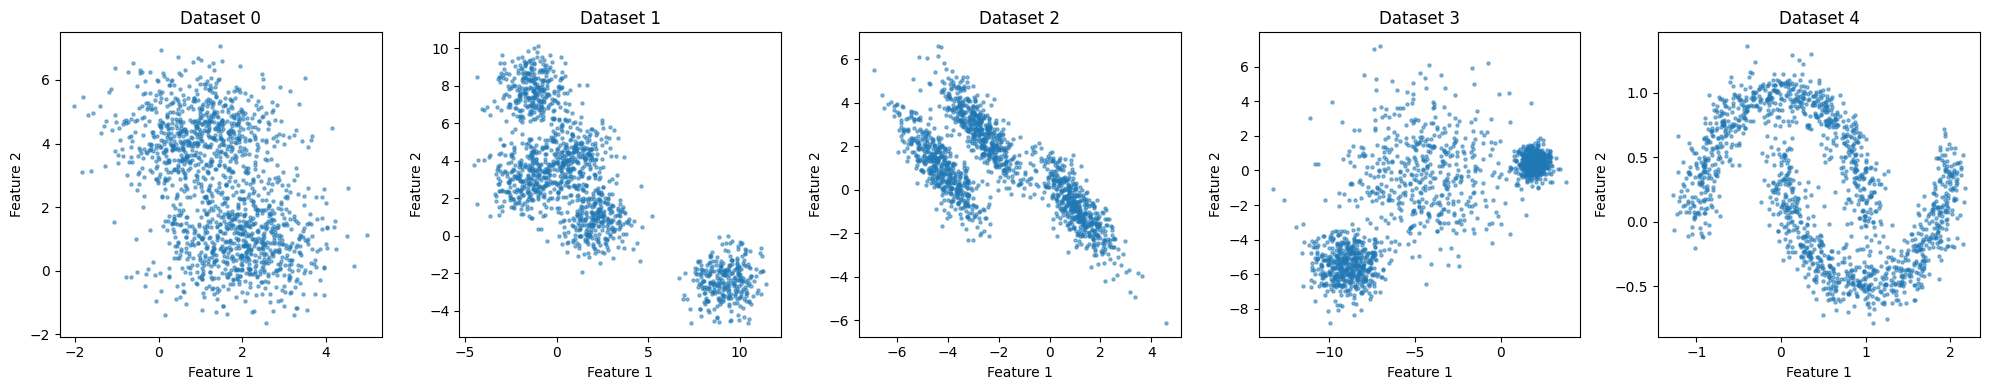

In [3]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axs):
    ax.scatter(X[i][:, 0], X[i][:, 1], s=5, alpha=0.5)
    ax.set_title(f"Dataset {i}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
plt.tight_layout()
plt.show()

* **Dataset 0:** I think there are two distinct clusters.
* **Dataset 1:** There are multiple clusters, potentially five or more, with some overlap. Maybe challenging for K-means.
* **Dataset 2:** There is a clear non-linear structure. DBSCAN or Spectral Clustering could be more suitable here.
* **Dataset 3:** Shows variability in cluster density, could effect the performance of K-means.
* **Dataset 4:** It's a crescent moon shape with two clear, non-linearly separable clusters. K-means is not ideal here, while DBSCAN and Spectral Clustering may better capture the structure.

Running K-means and plotting Elbow Curves

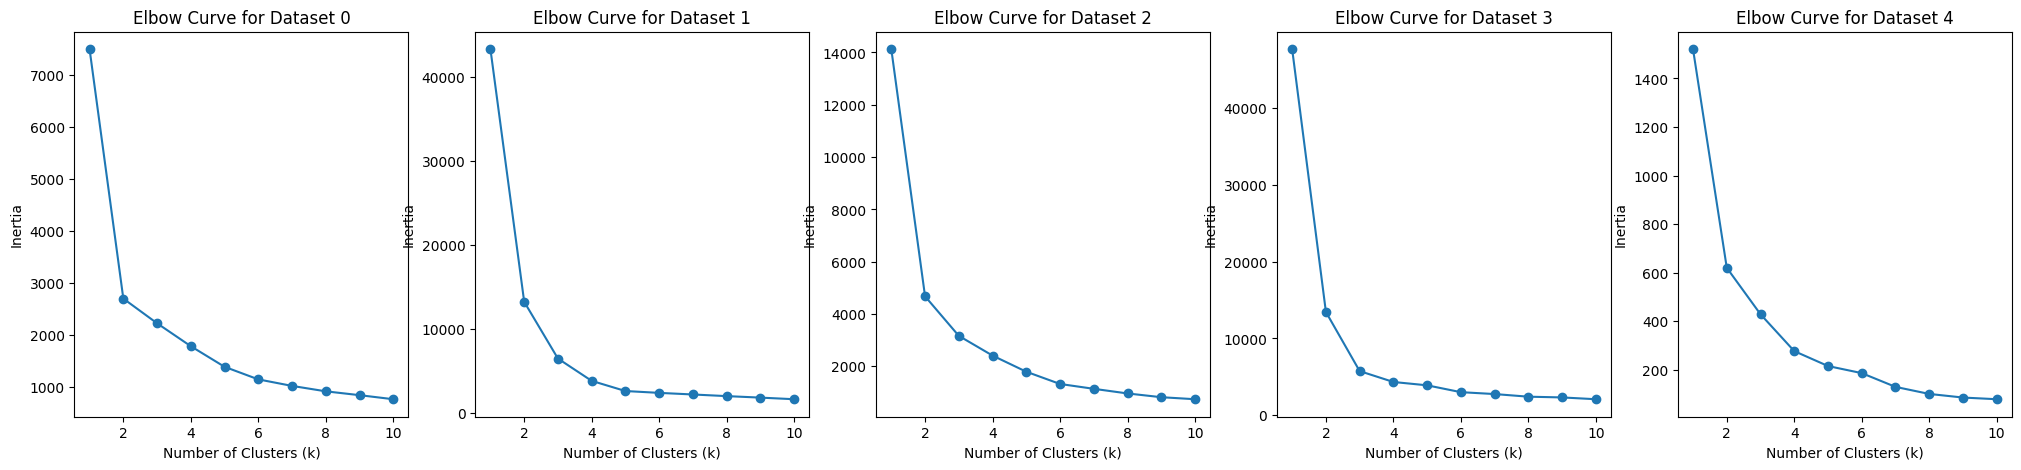

In [4]:
from sklearn.cluster import KMeans

# number of clusters to try
num_clusters = range(1, 11)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# loop over each dataset and subplot
for i, ax in enumerate(axes):
    inertias = []  # list to store the inertia for each k
    for k in num_clusters:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X[i])
        inertias.append(kmeans.inertia_)

    # plotting the elbow curve
    ax.plot(num_clusters, inertias, marker="o")
    ax.set_title(f"Elbow Curve for Dataset {i}")
    ax.set_xlabel("Number of Clusters (k)")
    ax.set_ylabel("Inertia")

plt.show()

* Dataset 0: The elbow seems to appear at k=2, after which the inertia decreases at a slower rate. This suggests that two clusters might be optimal for this dataset.
* Dataset 1: The curve starts to level off at k=5, implying that five clusters may be appropriate.
* Dataset 2: The elbow isn't as distinct, but there's a slight bend at k=3. Therefore, three clusters could be considered a reasonable choice.
* Dataset 3: The elbow is somewhat ambiguous, but there appears to be a change in the rate of decrease around k=3 and k=4.
* Dataset 4: This dataset shows an elbow at k=2, suggesting that two clusters might fit well.

Plotting Clustered Data

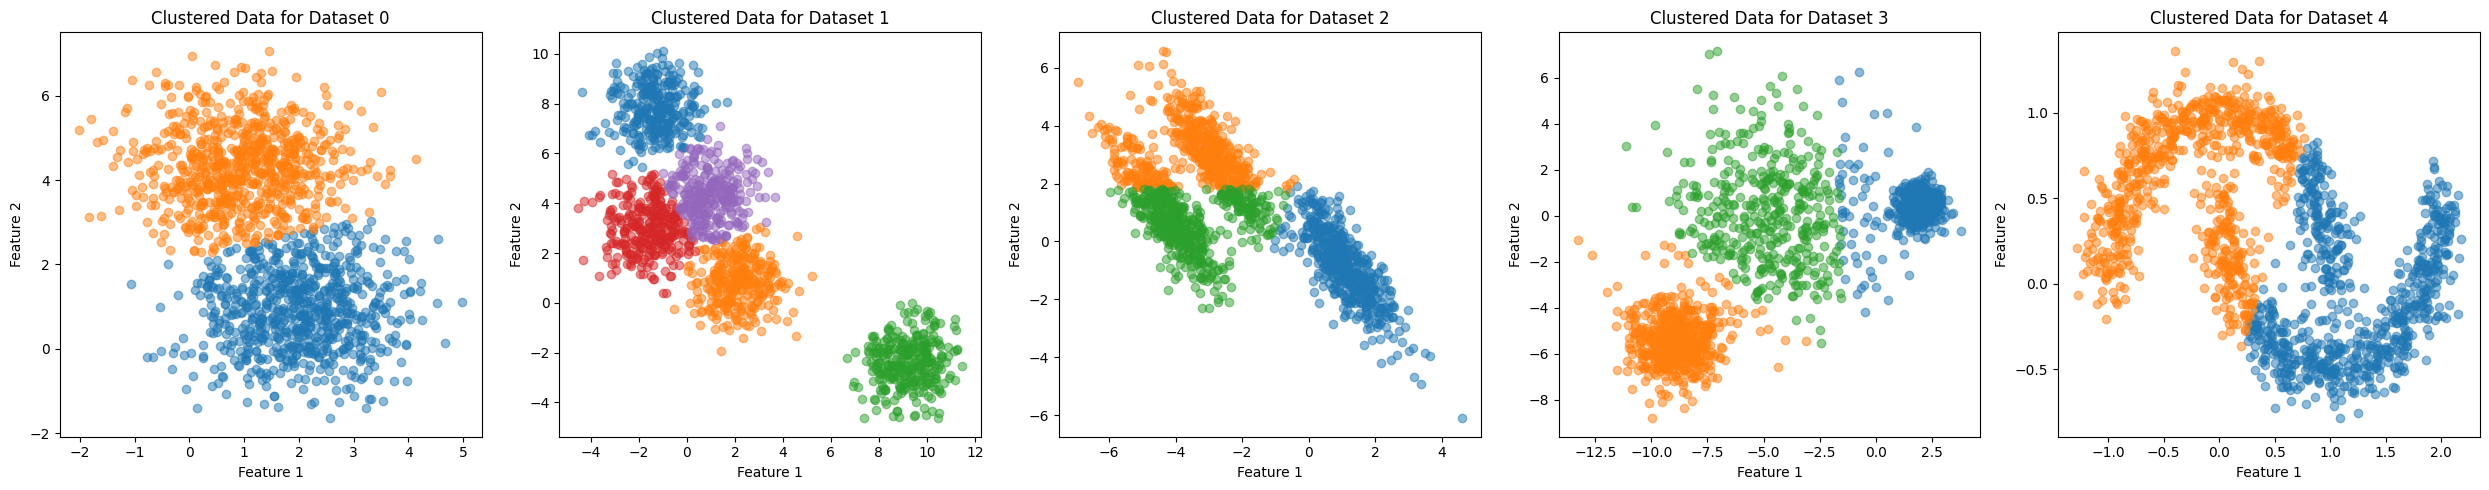

In [5]:
""" The chosen k's for each dataset """

chosen_ks = [2, 5, 3, 3, 2]

# plotting each dataset with its clusters
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, ax in enumerate(axes):
    # apply K-means with the selected number of clusters
    kmeans = KMeans(n_clusters=chosen_ks[i], random_state=0).fit(X[i])
    # get the cluster assignments
    labels = kmeans.labels_

    # scatter plot the data colored by cluster assignment
    # unique clusters are identified by unique label numbers in 'labels'
    unique_labels = np.unique(labels)
    for label in unique_labels:
        ax.scatter(
            X[i][labels == label, 0],
            X[i][labels == label, 1],
            label=f"Cluster {label}",
            alpha=0.5,
        )

    # formatting the plot
    ax.set_title(f"Clustered Data for Dataset {i}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# display the plots
plt.tight_layout()
plt.show()

**Observations**

* **Dataset 0:** Two clusters are visible, which seems to align well with the two visually distinct groups in the data.
* **Dataset 1:** Five clusters are differentiated, capturing the various centers around which the data points are grouped.
* **Dataset 2:** Three clusters show the algorithm’s attempt to find structure in what appears to be a continuous distribution of points.
* **Dataset 3:** Three clusters are present, although the separation between the groups is not as clear, reflecting the overlap in the data.
* **Dataset 4:** Two clusters highlight the crescent shapes, but K-means cannot capture the curvilinear separation perfectly due to its preference for spherical clusters.

**(b)**

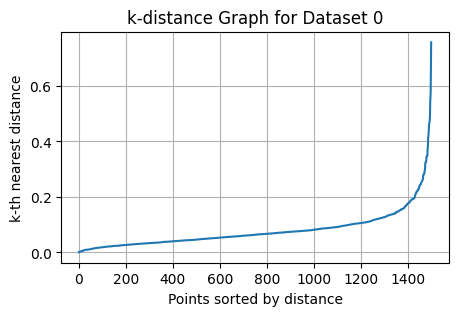

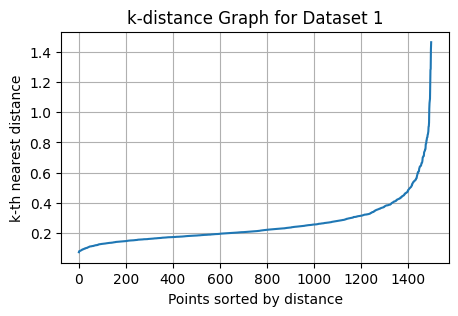

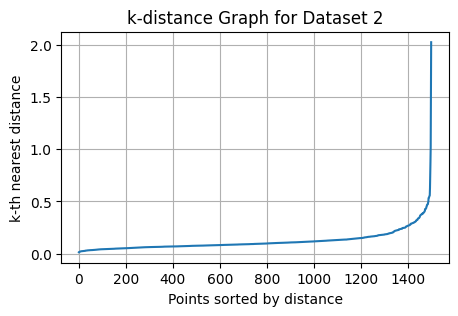

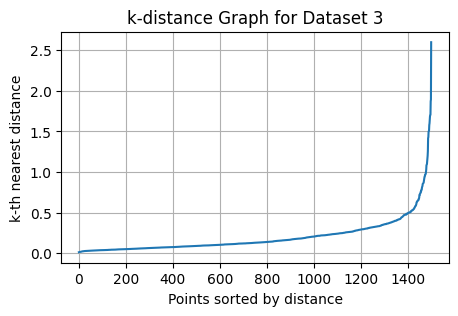

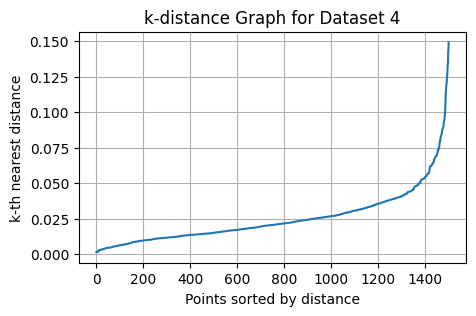

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

for i, dataset in enumerate(X):
    # NearestNeighbors for finding the average distance to the nearest n points for each point
    min_samples = chosen_ks[i]
    neigh = NearestNeighbors(n_neighbors=min_samples)
    nbrs = neigh.fit(dataset)
    distances, indices = nbrs.kneighbors(dataset)

    # sort the distances
    sorted_distances = np.sort(distances[:, min_samples - 1], axis=0)

    # plot the k-distance graph
    plt.figure(figsize=(5, 3))
    plt.plot(sorted_distances)
    plt.title(f"k-distance Graph for Dataset {i}")
    plt.xlabel("Points sorted by distance")
    plt.ylabel("k-th nearest distance")
    plt.grid(True)
    plt.show()

As per indpection, I think `eps` values correspond as follows:
* Dataset 0: 0.2
* Dataset 1: 0.4
* Dataset 2: 0.3
* Dataset 3: 0.5 
* Dataset 4: 0.03

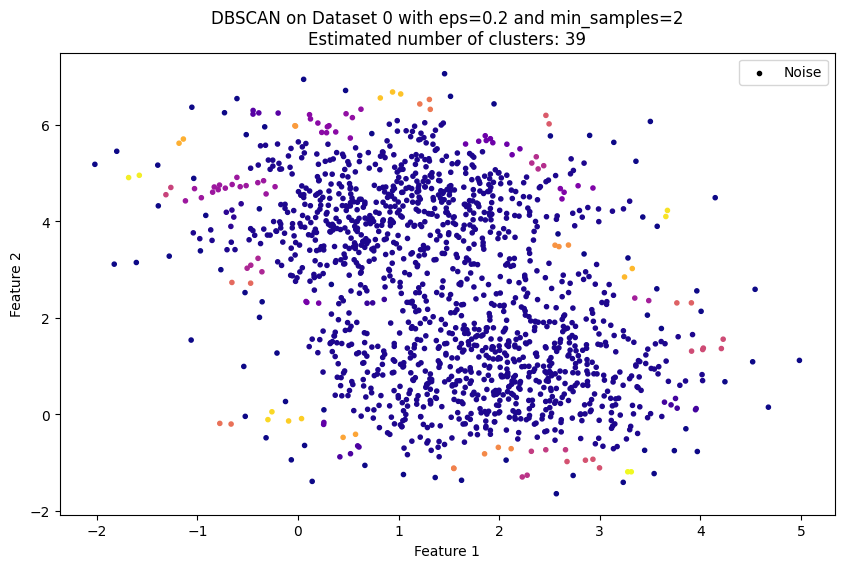

Dataset 0: DBSCAN with eps=0.2, min_samples=2, found 39 clusters


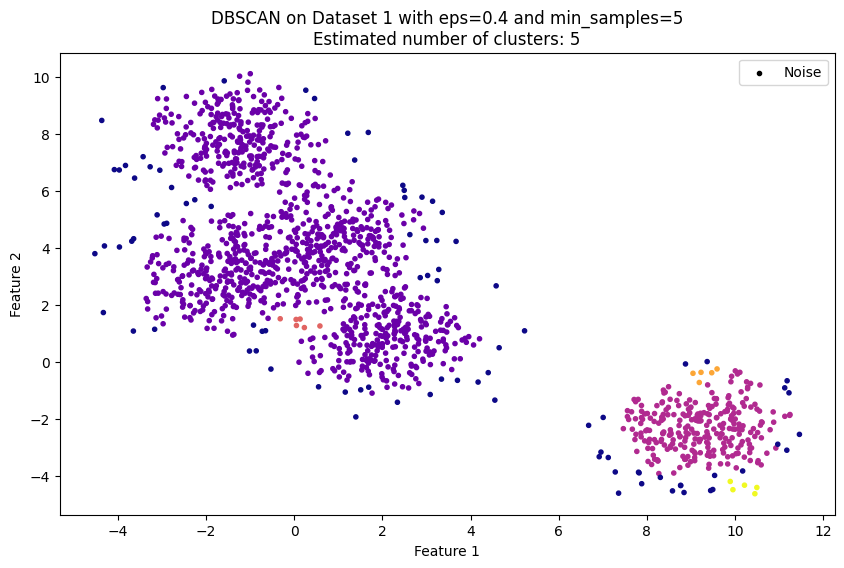

Dataset 1: DBSCAN with eps=0.4, min_samples=5, found 5 clusters


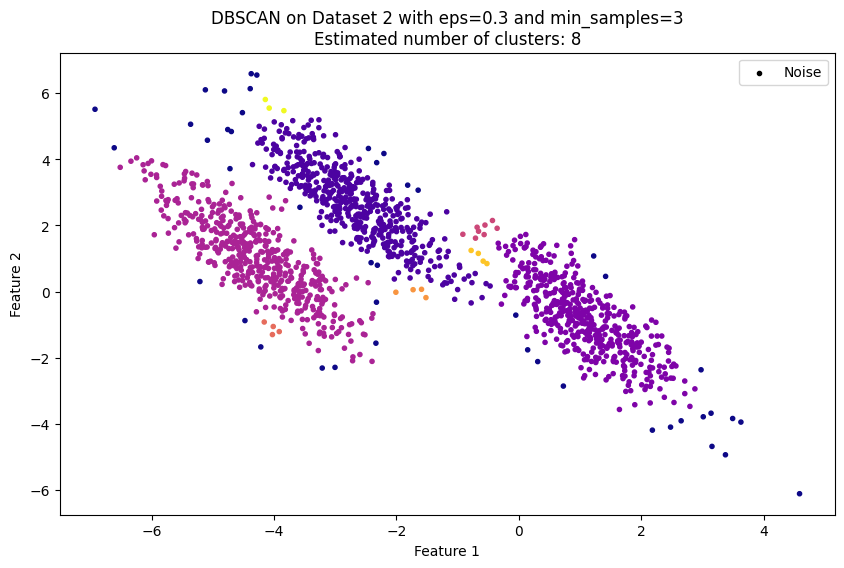

Dataset 2: DBSCAN with eps=0.3, min_samples=3, found 8 clusters


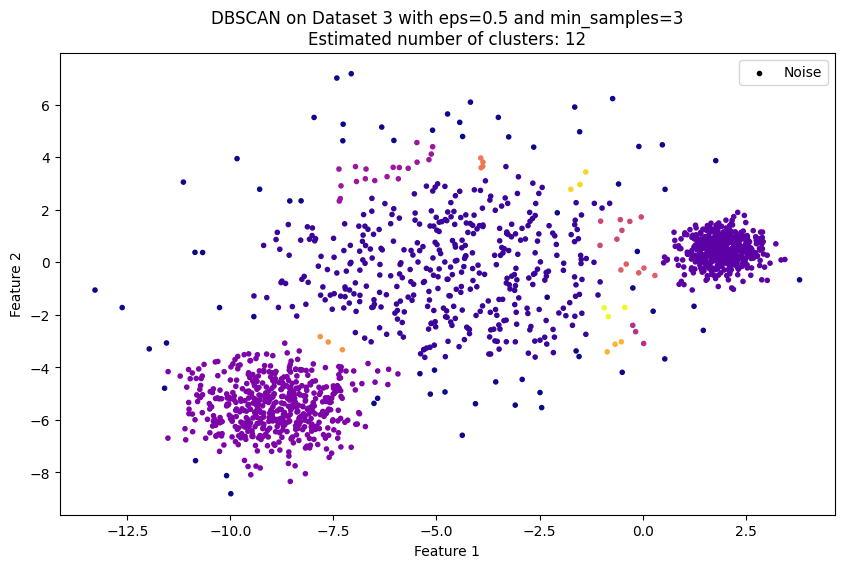

Dataset 3: DBSCAN with eps=0.5, min_samples=3, found 12 clusters


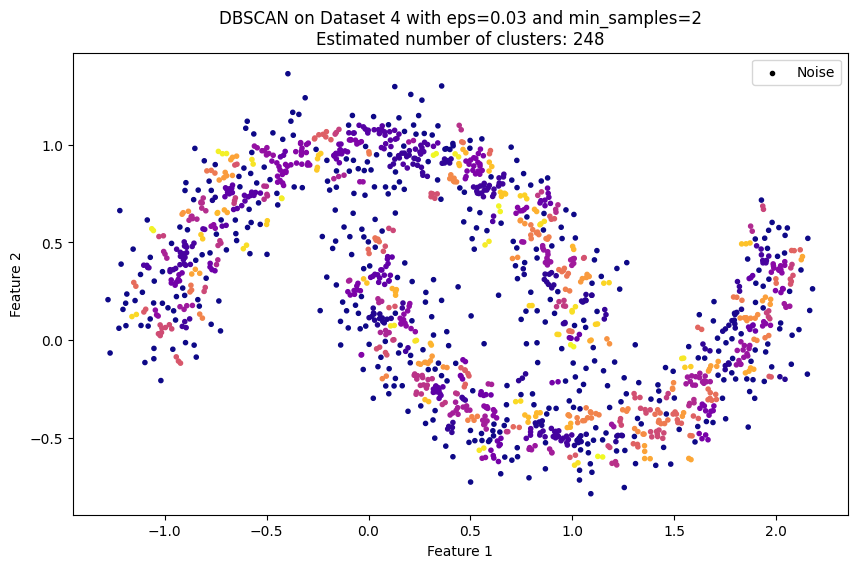

Dataset 4: DBSCAN with eps=0.03, min_samples=2, found 248 clusters


In [15]:
# chosen values from the graphs above
eps_values = [0.2, 0.4, 0.3, 0.5, 0.03]

for i, data in enumerate(X):
    eps = eps_values[i]
    # starting with the number of clusters from k-means as min-samples
    min_samples = chosen_ks[i]

    # applying DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)

    # to count the number of clusters (ignoring noise points labeled as -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # plot the results
    plt.figure(figsize=(10, 6))

    # assign color 'k' (black) for noise points labeled as -1
    scatter = plt.scatter(
        data[:, 0], data[:, 1], c=labels, 
        cmap="plasma", marker=".", label=labels
    )
    plt.title(
        f"DBSCAN on Dataset {i} with eps={eps} and min_samples={min_samples}\nEstimated number of clusters: {n_clusters}"
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # color noise points in black
    black_patch = plt.scatter([], [], marker=".", 
                              color="black", label="Noise")
    plt.legend(handles=[black_patch], loc="best")
    plt.show()

    print(
        f"Dataset {i}: DBSCAN with eps={eps}, min_samples={min_samples}, found {n_clusters} clusters"
    )

**(c)**

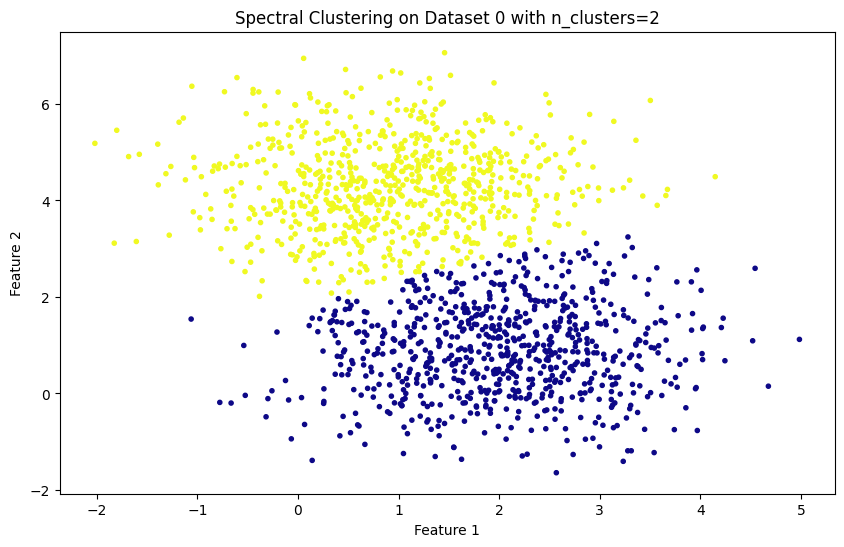

/home/codespace/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


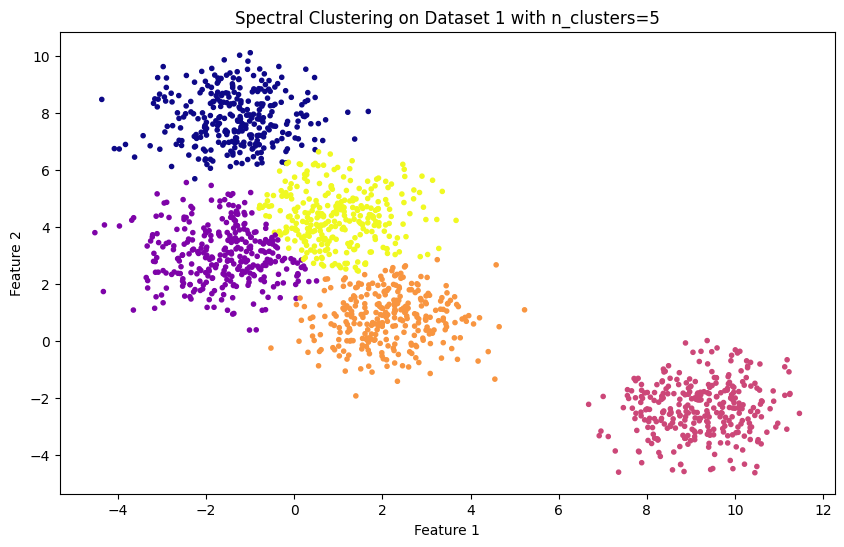

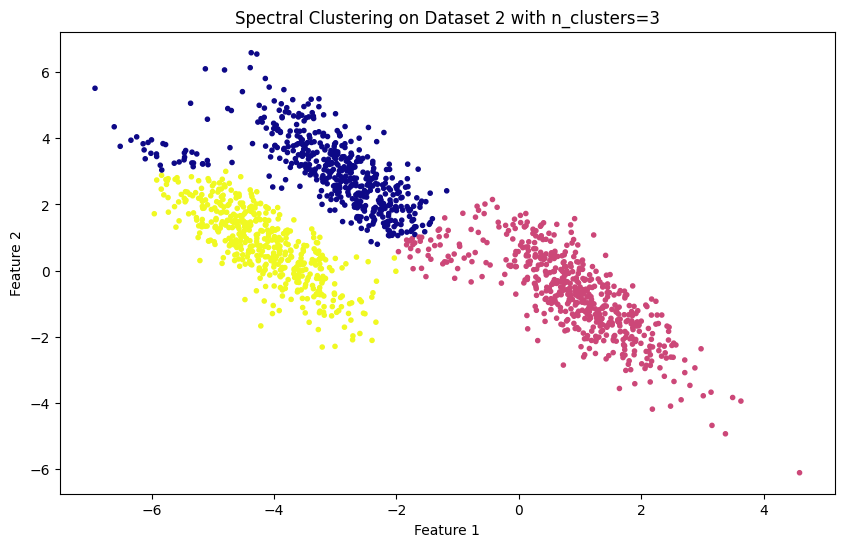

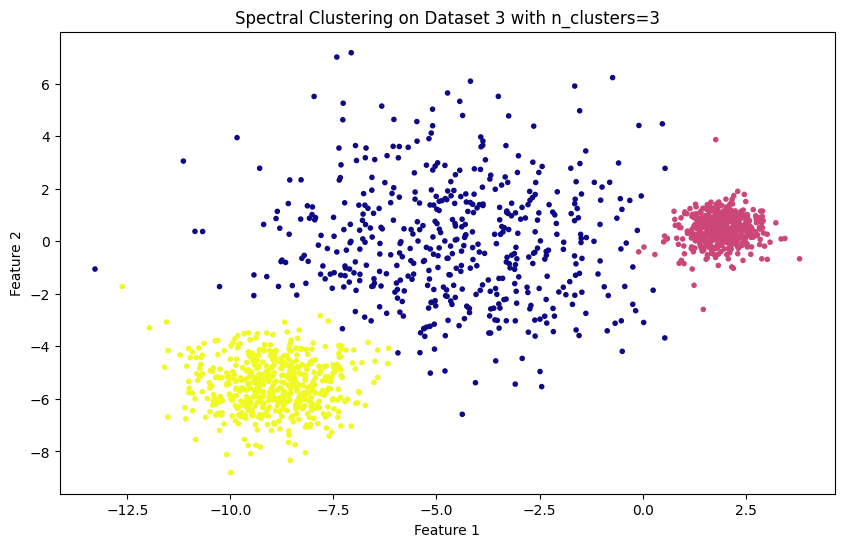

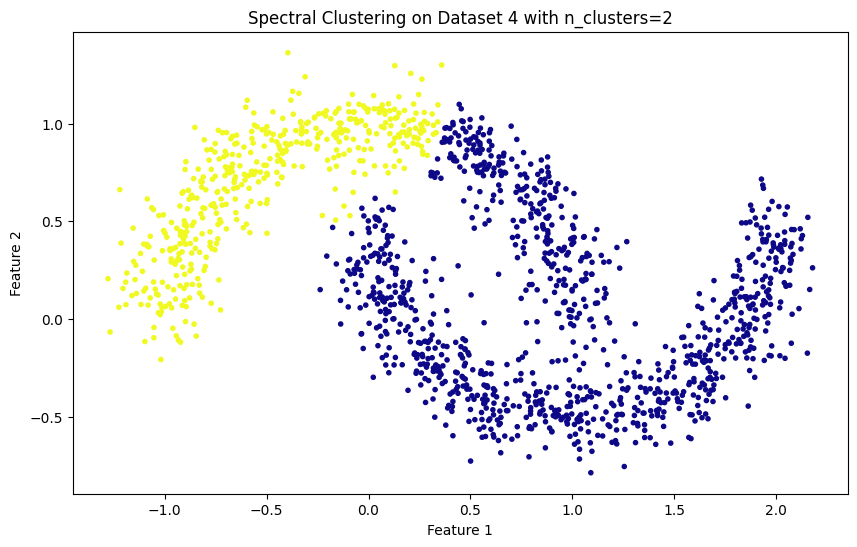

In [16]:
from sklearn.cluster import SpectralClustering

for i, data in enumerate(X):
    # apply Spectral Clustering with the number of clusters determined by k-means
    sc = SpectralClustering(
        n_clusters=chosen_ks[i],
        affinity="nearest_neighbors",
        assign_labels="kmeans",
        random_state=0,
    )

    # fit the model to the data and predict cluster assignments
    labels = sc.fit_predict(data)

    # plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="plasma", marker=".")
    plt.title(f"Spectral Clustering on Dataset {i} with n_clusters={chosen_ks[i]}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

**K-means:**

Works "best" when the data is well-separated into spherical clusters (e.g., Dataset 0 and Dataset 1).
Works "worst" with non-linearly separable data or with clusters of varying density and size (e.g., Dataset 2 and Dataset 4).
The elbow method for choosing k can sometimes be ambiguous and may require judgment, but it is generally faster and less computationally intensive than the other methods.

**DBSCAN:**

Works "best" on datasets with clusters of similar density that are not too spread out (e.g., Dataset 3).
Works "worst" when clusters have different densities or there is a lot of noise in the data, as it may either over-segment or under-segment the clusters (e.g., Datasets 0, 2, and 4).
Finding the right `eps` and `min_samples` parameters is very time-consuming and requires trial and error or additional techniques like k-distance graphs. Still it doesn't guarantee the results to be accurate.

**Spectral Clustering:**

Works "best" with clusters that are connected but not necessarily compact or evenly distributed, as it relies on the graph structure of the data (e.g., Dataset 2 and Dataset 4).
May work "worst" when clusters blend into each other without clear separation or when the number of clusters is not known, as it may not be able to distinguish between clusters that K-means or DBSCAN could potentially separate (e.g., Dataset 1).
Requires more computational effort due to the need to compute the eigenvectors of the similarity matrix, and the results can be sensitive to the choice of the similarity metric and number of clusters specified.

In terms of effort for parameter tuning:

* **K-means** is typically the easiest to tune with the elbow method providing a good starting point for *k*.
* **DBSCAN** requires substantial effort in tuning `eps` and `min_samples`, often necessitating an iterative approach with multiple runs.
* **Spectral Clustering** has a moderate tuning effort primarily related to the number of clusters and the choice of affinity, but can be computationally more demanding.

# 3

## [25 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Consider whether any preprocessing may need to be applied (do the data need to be normalized?). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 
- Briefly comment on how this may impact how well-clustered the data are. 
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?
- Notice that while t-SNE has a `fit` method and a `fit_transform` method, these methods are actually identical, and there is no `transform` method. Why is this? What implications does this imply for using this method?

*Note: Remember that you typically will not have labels available in most problems.*

Code is provided for loading the data below.

In [17]:
################################
# Load the data
################################
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# load dataset
digits = datasets.load_digits()
n_sample = digits.target.shape[0]
n_feature = digits.images.shape[1] * digits.images.shape[2]
X_digits = np.zeros((n_sample, n_feature))
for i in range(n_sample):
    X_digits[i, :] = digits.images[i, :, :].flatten()
y_digits = digits.target

**ANSWER**

**(a)**

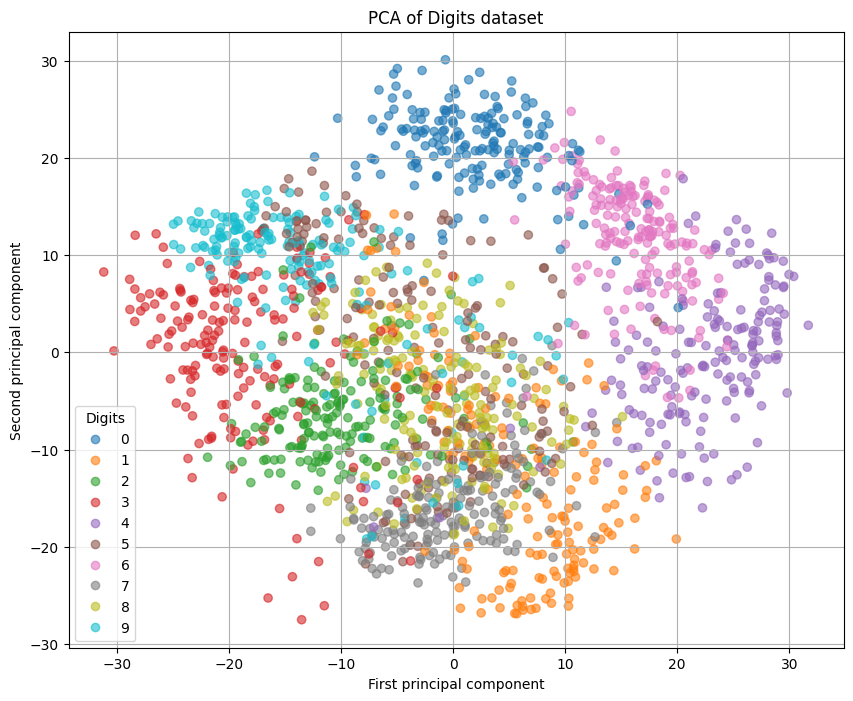

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_digits)

# plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                      c=y_digits, cmap="tab10", alpha=0.6)
plt.title("PCA of Digits dataset")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend(*scatter.legend_elements(), title="Digits")
plt.grid(True)
plt.show()

From the plot, we can observe that some digits clusters appear to be relatively distinct, indicating PCA's effectiveness in reducing dimensions while retaining some class separation.
However, there's significant overlap among many of the digit clusters. It's clear that two principal components are not enough to fully separate the digit classes, which is a common scenario with PCA on complex datasets.

**(b)**

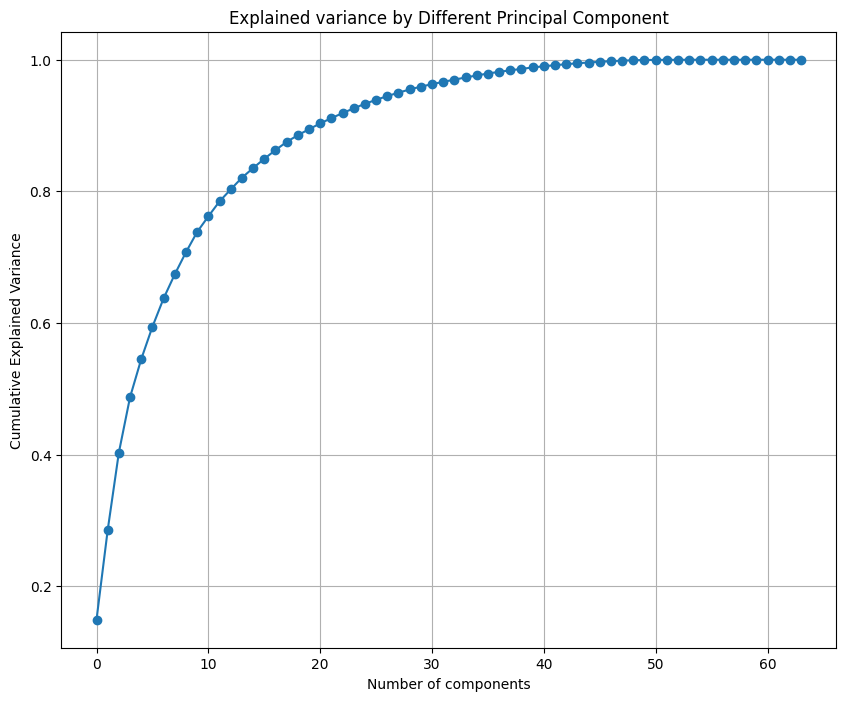

Fraction of variance unexplained by the first two components:  0.71


In [19]:
pca_full = PCA()
pca_full.fit(X_digits)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# plot
plt.figure(figsize=(10, 8))
plt.plot(cumulative_variance, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained variance by Different Principal Component")
plt.grid(True)
plt.show()

unexplained_variance = 1 - cumulative_variance[1]
print(
    f"Fraction of variance unexplained by the first two components: {unexplained_variance: .2f}"
)

The cumulative explained variance plot indicates that the first two principal components account for about 29% of the variance (since 71% is unexplained). This leaves a significant amount of information, or variance, unaccounted for, suggesting that while PCA reduces dimensionality, there's a trade-off in terms of lost information.

When considering how well-clustered the data are in the reduced space, it's important to remember that PCA is a linear projection. If the data has a non-linear structure, PCA might not be able to project the points in a way that separates different classes, even if more components are added. This is where non-linear dimensionality reduction techniques like t-SNE can be particularly useful.

**(c)**

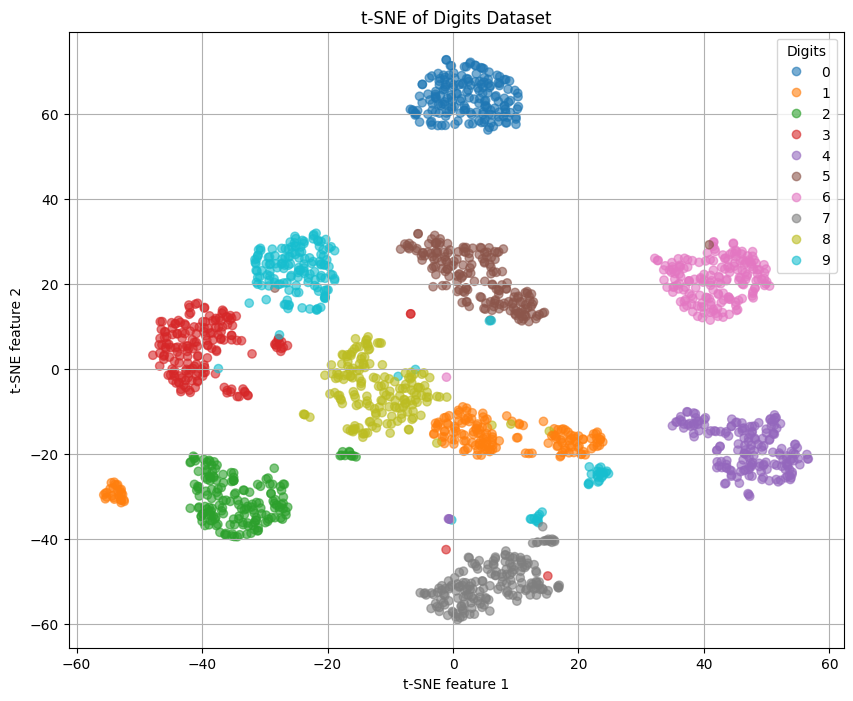

In [20]:
from sklearn.manifold import TSNE

# apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, 
            learning_rate=200, random_state=0)
X_tsne = tsne.fit_transform(X_digits)

# plot the data in 2D space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=y_digits, cmap="tab10", alpha=0.6)
plt.title("t-SNE of Digits Dataset")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.legend(*scatter.legend_elements(), title="Digits")
plt.grid(True)
plt.show()

**(d)**

* **PCA** performed well in terms of computational efficiency and is a linear technique that's good for preserving global structure but less effective for complex, non-linear data structures.
* **t-SNE** provided a superior visualization with clear separation between the different digit clusters, capturing the local relationships well. However, it is computationally more intensive and sensitive to hyperparameters like perplexity and learning rate.

The `fit` method in t-SNE performs the optimization of the embedding and there's no subsequent `transform` method because t-SNE does not learn a function that can map new data into the existing embedded space. This means that t-SNE is not directly suitable for out-of-sample predictions or for processing new data points that were not part of the original dataset. Each time you run t-SNE, you get a new embedding, which is why it's typically used as an exploratory tool for visualization rather than a feature transformation step in a predictive modeling pipeline.

The implications for using t-SNE include:
* t-SNE is mainly used for exploratory data analysis to visualize the structure of high-dimensional data in two or three dimensions.
* Since t-SNE does not support out-of-sample data points, it's not typically used as a pre-processing step for machine learning models that require predictions on new data.
* It is best used in a supervised learning context when all data (including future test data) is available at the time of running the algorithm, or when the primary goal is to understand data structure rather than build a predictive model.